In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import itertools
import re
# from ggplot import *
from scipy import stats
from scipy.stats import pearsonr

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [2]:
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
##Load csv file
##Freshest final latest last newest load loads

nomom = pd.read_csv('NOMOM_ALL_data_python.csv', index_col=0, na_values=['NA'])

Con=nomom.loc[(nomom['Group'] == "Con")]
Con.name = 'Con'
NR=nomom.loc[(nomom['Group'] == "NR")]
NR.name = 'NR'



# PCA across sign vars that show group difference

- Incude everything both groups (no early life)
- Nomom only


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import decomposition

In [74]:
#Select Data & Z-score
# this should be all vars with a group difference... 
# ALSO! It should probably not fillna - that was a shortcut to get it to run.
# ALSO, ALSO! you might want to z-score each variable... 

data=nomom
# data=NR

def zscore(x):
    return (x - x.mean())/x.std()

# selected_nomom = data[['NR',#'Dam_s_Age_yrs_at_Subject_s_DOB', 
# #'X_Days_Single_Birth_to_PET_final','Days_with_mom_in_pair_Birth_to_PET','X_Days_Group_without_mom_Birth_to_PET_final','Year_1_pair','Year_2_pair','Total_Unique_Cagemates_Birth_to_PET_final',
# 'EN_NECall_pet_trans','EN_Aall_hip_trans','EN_STall_hip_trans',
# 'EO_NECall_pet_trans','EO_NECall_hip_trans',
# 'FF_NECall_pet_trans','FF_Aall_hip_trans',
# 'SD_NECall_pet_trans','SD_Aall_hip_trans','SD_NECall_hip_trans','SD_STall_hip_trans',
# 'LO_Aall_hip_trans',
# 'O_CSF_res',
# 'jacPos_1_dlpfc', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacNeg_1_temporal', 'jacNeg_2_area10', 'jacNeg_3_ofc',
# 'IC_av_ad',
# 'rs_fMRI_bilateral_1_neg_bilateral', 'rs_fMRI_bilateral_1_pos_bilateral', 'rs_fMRI_bilateral_2_neg_bilateral', 'rs_fMRI_bilateral_2_pos_bilateral', 'rs_fMRI_bilateral_3_neg_bilateral', 'rs_fMRI_bilateral_4_neg_bilateral', 'rs_fMRI_bilateral_5_neg_bilateral', 'rs_fMRI_bilateral_6_neg_bilateral', 'rs_fMRI_bilateral_7_neg_bilateral',
# 'DTI_AD_1_neg_AD', 'DTI_AD_2_neg_AD', 'DTI_AD_3_neg_AD', 'DTI_AD_4_neg_AD', 'DTI_AD_5_neg_AD', 'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 'DTI_AD_8_neg_AD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 'DTI_MD_1_neg_MD', 'DTI_MD_2_neg_MD', 'DTI_MD_3_neg_MD', 'DTI_MD_4_neg_MD', 'DTI_MD_5_neg_MD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 'DTI_MD_9_neg_MD', 'DTI_RD_1_neg_RD', 'DTI_RD_2_neg_RD', 'DTI_RD_3_neg_RD', 'DTI_RD_4_neg_RD', 'DTI_RD_5_neg_RD', 'DTI_RD_6_neg_RD', 'DTI_RD_7_neg_RD', 'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 
# 'petPos_1_nearInsula', 'petPos_2_insula', 'petNeg_1_parietal',
# 'rs_fMRI_postCing_1_neg_postCing', 'rs_fMRI_postCing_1_pos_postCing', 'rs_fMRI_postCing_2_neg_postCing', 'rs_fMRI_postCing_2_pos_postCing', 'rs_fMRI_postCing_3_neg_postCing', 'rs_fMRI_postCing_4_neg_postCing', 'rs_fMRI_postCing_5_neg_postCing', 'rs_fMRI_postCing_6_neg_postCing', 'rs_fMRI_postCing_7_neg_postCing', 'rs_fMRI_postCing_8_neg_postCing',
# ]].dropna()

selected_nomom = data[['NR',
#BEHAVIOR
'EN_NECall_pet_trans','EN_Aall_hip_trans','EN_STall_hip_trans',
'EO_NECall_pet_trans','EO_NECall_hip_trans',
'FF_NECall_pet_trans','FF_Aall_hip_trans',
'LO_Aall_hip_trans',
'SD_NECall_pet_trans','SD_Aall_hip_trans','SD_NECall_hip_trans','SD_STall_hip_trans',
#HORMONES
# 'Oxy_CSF_Rep1_resid',
# 'Oxy_CSF_Rep2_resid',
'Oxy_CSF_Mean_reps_resid',
# 'Oxy_CSF_Mean_reps_resid_CV',
# 'Oxy_CSF_Mean_reps_cv30_resid',
#Brain
'DTI_MD_11_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_9_neg_MD', 'DTI_MD_8_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_6_neg_MD', 'DTI_MD_5_neg_MD', 'DTI_MD_4_neg_MD', 'DTI_MD_3_neg_MD', 'DTI_MD_2_neg_MD', 'DTI_MD_1_neg_MD', 
'DTI_AD_8_neg_AD', 'DTI_AD_7_neg_AD', 'DTI_AD_6_neg_AD', 'DTI_AD_5_neg_AD', 'DTI_AD_4_neg_AD', 'DTI_AD_3_neg_AD', 'DTI_AD_2_neg_AD','DTI_AD_1_neg_AD',
'DTI_RD_9_neg_RD', 'DTI_RD_8_neg_RD', 'DTI_RD_7_neg_RD', 'DTI_RD_6_neg_RD', 'DTI_RD_5_neg_RD', 'DTI_RD_4_neg_RD', 'DTI_RD_3_neg_RD', 'DTI_RD_2_neg_RD','DTI_RD_1_neg_RD',
]].dropna()

# save group information for t-test
grp = selected_nomom['NR']

# zscore 
selected_nomom = selected_nomom.apply(zscore, axis=0)

# drop NR variable. 
pca_data = selected_nomom.drop(columns='NR')
# select only NR groups
pca_data_NR = pca_data.loc[grp==1]
# select only Controls groups
pca_data_Con = pca_data.loc[grp==0]


#pca_data = selected_nomom
# print(pca_data.index.size)
# print(selected_nomom.columns)
# print(grp)
# print(NR)
# print(Con)
#print(pca_data_NR.shape)

In [83]:
print(pca_data.shape, pca_data_NR.shape, pca_data_Con.shape)

(48, 41) (24, 41) (24, 41)


In [76]:
# #Or run all data (different analysis)
# #NOTE FIX FILL NA
# pca_data_all = nomom.select_dtypes(include=['float', 'int'])
# #Z-score all data
# pca_data_all = pca_data_all.apply(zscore, axis=0).dropna(axis=1)


# print(nomom.select_dtypes(include=['float', 'int']).shape, pca_data_all.shape)

In [77]:
#specifying components
#Currently none pre-specified
num_comp = None
pca = decomposition.PCA(n_components=num_comp)

In [91]:
##Run PCA on all data
# pc = pca.fit_transform(pca_data_all)

## Run PCA on NR data
# pc = pca.fit_transform(pca_data_NR)

## Run PCA on Con data
pc = pca.fit_transform(pca_data_Con)

In [92]:
# pc_df = pd.DataFrame(data = pc , 
#         columns = ['PC1', 'PC2','PC3','PC4'])
# pc_df['Cluster'] = Y1
# pc_df.head()

In [93]:
pca.explained_variance_ratio_


array([3.38257698e-01, 1.21668560e-01, 1.07418661e-01, 8.81805377e-02,
       7.46358748e-02, 5.37982780e-02, 5.22698193e-02, 3.25250351e-02,
       3.03645601e-02, 2.44345287e-02, 1.57763283e-02, 1.47172050e-02,
       1.34832504e-02, 7.84269111e-03, 7.16990967e-03, 5.30065472e-03,
       4.46537439e-03, 2.39258228e-03, 2.04390683e-03, 1.18771137e-03,
       1.12765537e-03, 7.11827421e-04, 2.27350448e-04, 2.45716992e-33])

In [94]:
# get projection of all-data, when fit on NR... 
pc_all = pca.transform(pca_data) #### SPECIFIC TO ALL VARS
print(pc_all.shape, pca_data.shape)

(48, 24) (48, 41)


In [95]:
# plt.plot(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_ )
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.title('Total Variance Explained: '+str(np.sum(pca.explained_variance_ratio_)))

# # plt.savefig('../FIGS/NOMOM_PCA_scree_fitNR.pdf', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig('../FIGS/NOMOM_PCA_scree_fitCon.pdf', dpi=300, bbox_inches='tight', transparent=True)
# # plt.savefig('../FIGS/NOMOM_PCA_scree_fitALL.pdf', dpi=300, bbox_inches='tight', transparent=True)

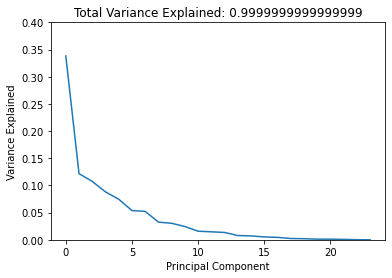

In [96]:
plt.plot(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_ )
plt.ylim([0, 0.4])
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Total Variance Explained: '+str(np.sum(pca.explained_variance_ratio_)))

# plt.savefig('../FIGS/NOMOM_PCA_scree_fitNR.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig('../FIGS/NOMOM_PCA_scree_fitCon.pdf', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig('../FIGS/NOMOM_PCA_scree_fitALL.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [116]:
# df = pd.DataFrame({'var':pca.explained_variance_ratio_,
#              'PC':['PC1','PC2','PC3','PC4']})
# sns.barplot(x='PC',y="var", 
#            data=df, color="c");

In [71]:
# sns.lmplot( x="PC1", y="PC2",
#   data=pc_df, 
#   fit_reg=False, 
#   hue='Cluster', # color by cluster
#   legend=True,
#   scatter_kws={"s": 80}) # specify the point size

In [64]:
# #Output all principle components
# plt.plot(pc[:,0], pc[:,1], 'or')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# print(selected_nomom)

In [97]:
# ttest on each PC...

print(pc.shape)
PC_t_list = []
PC_p_list = []

for component_number in range(pc.shape[1]):
#     print(component_number)
#     target_pc = pc[:,component_number]
    # do t-test of group on target_pc
    X = selected_nomom['NR'] ### FOR NOT ALL VARS... 
#     X = nomom['NR'] #### SPECIFIC TO ALL VARS
    Y = pc_all[:,component_number]
    X = sm.add_constant(X)
#     print(X.shape, Y.shape)
    results = sm.OLS(Y,X).fit()
    # this_t = ... 
    PC_t_list.append(results.tvalues[1])
    PC_p_list.append(results.pvalues[1])    


(24, 24)


In [120]:
# plt.plot(range(0, len(PC_t_list)), PC_t_list, "or")
# plt.xlabel('Principle Component')
# plt.ylabel('Group t-value')

# critical_t = stats.t.ppf(1-0.025, 48)

# plt.plot(plt.xlim(),(critical_t, critical_t), '--k')


[2.9050410543734203e-08, 0.8799849400247842, 0.9815089914248577, 0.003943845418567931, 0.8586878535281988, 0.2413409996501394, 0.0883761092190333, 0.18496259023180842, 0.0004959581523958436, 0.6475555836677837, 0.02770833427980377, 0.004236200303686935, 0.14155327915051624, 0.0021136054353127257, 0.01719933607654465, 0.07389685262191391, 0.0005875784674497403, 0.0004351101215810466, 0.6620962240038255, 0.006835177614878031, 0.2679745844057115, 0.0069673403974558415, 1.1358390041453442e-07, 0.048329987510023736]


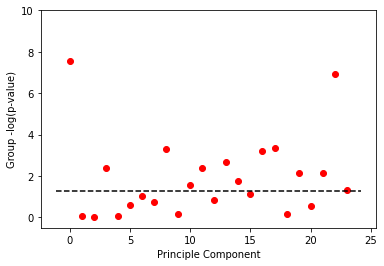

In [98]:
print(PC_p_list)
plt.plot(range(0, len(PC_p_list)), -1*np.log10(PC_p_list), "or")
plt.ylim([-0.5, 10])
plt.xlabel('Principle Component')
plt.ylabel('Group -log(p-value)')

critical_t = stats.t.ppf(1-0.025, 48)
critical_p = -1*np.log10(.05)

plt.plot(plt.xlim(),(critical_p, critical_p), '--k')

# plt.savefig('../FIGS/NOMOM_PCA_t-test_fitNR.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig('../FIGS/NOMOM_PCA_t-test_fitCon.pdf', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig('../FIGS/NOMOM_PCA_t-test_fitALL.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [124]:
# loadings = pd.DataFrame(pca.components_.T, index=pca_data.columns) #### NORMAL. 
loadings = pd.DataFrame(pca.components_.T, index=pca_data_all.columns) ### SPECIFIC TO ALL
# loadings.to_csv('NOMOM_PCA_loadings_fitNR.csv')
# loadings.to_csv('NOMOM_PCA_loadings_fitCon.csv')
loadings.to_csv('NOMOM_PCA_loadings_fitALL.csv')

# pca.components_

# Mediation of every brain var on every behavior

1: Run on single variable 

2: Loop over single variables


In [10]:
import statsmodels.api as sm
import statsmodels.genmod.families.links as links
from statsmodels.stats.mediation import Mediation

import pingouin as pg

In [69]:
Y = 'FF_NECall_pet_trans' #cong_mes
X = 'NR'#emo
M = 'petPos_2_insula'#treat

mediation_data = nomom[[X,Y,M]].dropna()

# code to do mediation

# USING STATSMODELS
# probit = links.probit
# outcome_model = sm.GLM.from_formula(Y+" ~ "+X+" + "+ M,
#                                      mediation_data, family=sm.families.Binomial(link=probit()))
# mediator_model = sm.OLS.from_formula(X+" ~ "+M, mediation_data)
# med = Mediation(outcome_model, mediator_model, M, X).fit()
# med.summary()

# USING PINGOUIN
pg.mediation_analysis(data=mediation_data, x=X, m=M, y=Y, covar=None, alpha=0.05, n_boot=500, seed=None, return_dist=False)



,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,petPos_2_insula ~ X,-0.113072,0.028299,0.000221,-0.169970,-0.056174,Yes
1,Y ~ petPos_2_insula,5.622808,2.003874,0.007225,1.593749,9.651867,Yes
2,Total,-1.000103,0.467542,0.037545,-1.940158,-0.060047,Yes
3,Direct,-0.485497,0.524333,0.359212,-1.540319,0.569326,No
4,Indirect,-0.514606,0.280609,0.012000,-1.172758,-0.080455,Yes


In [19]:
# df = nomom
# Y = 'SD_Aall_hip_trans' #(control)
# X = 'NR'
# M = 'DTI_AD_1_neg_AD'
# ##1. direct effect: X --> Y
# DV_LF = df.SD_Aall_hip_trans
# IV_X = sm.add_constant(df[['NR', 'SD_Aall_hip_trans']])
# fe_mod_X = PanelOLS(DV_LF, IV_X, entity_effects=True )
# fe_res_X = fe_mod_X.fit(cov_type='clustered', cluster_entity=True)
# print(fe_res_X)

# ##2. X --> M
# DV_A = df.M
# IV_A = sm.add_constant(df[['NR', 'SD_Aall_hip_trans']])
# fe_mod_A = PanelOLS(DV_A, IV_A, entity_effects=True )
# fe_res_A = fe_mod_A.fit(cov_type='clustered', cluster_entity=True)
# print(fe_res_A)

# ##3. M --> Y
# IV_M = sm.add_constant(df[['DTI_AD_1_neg_AD', 'SD_Aall_hip_trans']])
# fe_mod_M = PanelOLS(DV_LF, IV_M, entity_effects=True )
# fe_res_M = fe_mod_M.fit(cov_type='clustered', cluster_entity=True)
# print(fe_res_M)

# ##4. X, M --> Y
# IV_T = sm.add_constant(df[['NR', 'DTI_AD_1_neg_AD', 'SD_Aall_hip_trans']])
# fe_mod_T = PanelOLS(DV_LF, IV_T, entity_effects=True )
# fe_res_T = fe_mod_T.fit(cov_type='clustered', cluster_entity=True)
# print(fe_res_T)

# med = Mediation(fe_res_T, fe_res_A, 'NR', 'DTI_AD_1_neg_AD').fit()
# med.summary()

In [32]:
# !pip install pingouin

In [33]:
pg.mediation_analysis(data=mediation_data, x=X, m=M, y=Y, covar=None, alpha=0.05, n_boot=500, seed=None, return_dist=False)




,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,petPos_2_insula ~ X,-0.113072,0.028299,0.000221,-0.169970,-0.056174,Yes
1,Y ~ petPos_2_insula,5.622808,2.003874,0.007225,1.593749,9.651867,Yes
2,Total,-1.000103,0.467542,0.037545,-1.940158,-0.060047,Yes
3,Direct,-0.485497,0.524333,0.359212,-1.540319,0.569326,No
4,Indirect,-0.514606,0.292423,0.008000,-1.270032,-0.112313,Yes


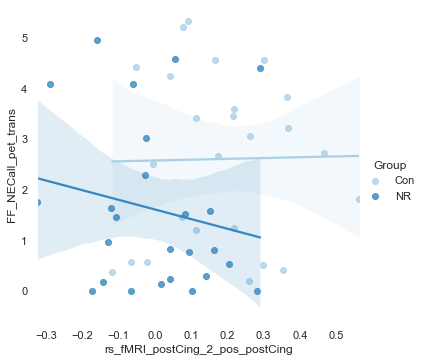

In [71]:
######
#GRAPHS OF RELATIONS
#Graph resuls
#Plot sign correlations
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("Blues")
#sns.set_context("poster")

# 'EN_NECall_pet_trans','EN_Aall_hip_trans','EN_STall_hip_trans',
# 'EO_NECall_pet_trans','EO_NECall_hip_trans',
# 'FF_NECall_pet_trans','FF_Aall_hip_trans',
# 'SD_NECall_pet_trans','SD_Aall_hip_trans','SD_NECall_hip_trans','SD_STall_hip_trans',
# 'LO_Aall_hip_trans',
# 'O_CSF_res',
# 'jacPos_1_dlpfc', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacNeg_1_temporal', 'jacNeg_2_area10', 'jacNeg_3_ofc',
# 'IC_av_ad',
# 'rs_fMRI_bilateral_1_neg_bilateral', 'rs_fMRI_bilateral_1_pos_bilateral', 'rs_fMRI_bilateral_2_neg_bilateral', 'rs_fMRI_bilateral_2_pos_bilateral', 'rs_fMRI_bilateral_3_neg_bilateral', 'rs_fMRI_bilateral_4_neg_bilateral', 'rs_fMRI_bilateral_5_neg_bilateral', 'rs_fMRI_bilateral_6_neg_bilateral', 'rs_fMRI_bilateral_7_neg_bilateral',
# 'DTI_AD_1_neg_AD', 'DTI_AD_2_neg_AD', 'DTI_AD_3_neg_AD', 'DTI_AD_4_neg_AD', 'DTI_AD_5_neg_AD', 'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 'DTI_AD_8_neg_AD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 'DTI_MD_1_neg_MD', 'DTI_MD_2_neg_MD', 'DTI_MD_3_neg_MD', 'DTI_MD_4_neg_MD', 'DTI_MD_5_neg_MD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 'DTI_MD_9_neg_MD', 'DTI_RD_1_neg_RD', 'DTI_RD_2_neg_RD', 'DTI_RD_3_neg_RD', 'DTI_RD_4_neg_RD', 'DTI_RD_5_neg_RD', 'DTI_RD_6_neg_RD', 'DTI_RD_7_neg_RD', 'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 
# 'petPos_1_nearInsula', 'petPos_2_insula', 'petNeg_1_parietal',
# 'rs_fMRI_postCing_1_neg_postCing', 'rs_fMRI_postCing_1_pos_postCing', 'rs_fMRI_postCing_2_neg_postCing', 'rs_fMRI_postCing_2_pos_postCing', 'rs_fMRI_postCing_3_neg_postCing', 'rs_fMRI_postCing_4_neg_postCing', 'rs_fMRI_postCing_5_neg_postCing', 'rs_fMRI_postCing_6_neg_postCing', 'rs_fMRI_postCing_7_neg_postCing', 'rs_fMRI_postCing_8_neg_postCing',




hue='Group'
data=nomom
y='FF_NECall_pet_trans'
x='rs_fMRI_postCing_2_pos_postCing'
sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Self Directed (Alone HIP)")
# plt.xlabel("Internal Capsule Cluster (AD)")

# hue='Group'
# data=nomom
# y='SD_Aall_hip_trans'
# x='DTI_MD_11_neg_MD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Self Directed (Alone HIP)")
# plt.xlabel("Internal Capsule Cluster (MD)")


# y='X_Days_Group_without_mom_Birth_to_PET_final'
# x='DTI_MD_11_neg_MD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.ylabel("# of days in group without mom")
# plt.xlabel("Internal Capsule Cluster (MD)")

# y='SD_Aall_hip_trans'
# x='DTI_RD_7_neg_RD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.ylabel("Self Directed (Alone HIP)")
# plt.xlabel("Internal Capsule cluster (RD)")